In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from string import ascii_lowercase
from itertools import combinations

import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import  GradientBoostingClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [107]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('train.csv',index_col=0)
train_data.head()
test_data = pd.read_csv('test.csv',index_col=0)

In [108]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            14959 non-null  float64
 1   Q2            14931 non-null  float64
 2   Q3            14950 non-null  float64
 3   Q4            14929 non-null  float64
 4   Q5            14962 non-null  float64
 5   Q6            14952 non-null  float64
 6   Q7            14924 non-null  float64
 7   Q8            14952 non-null  float64
 8   Q9            14944 non-null  float64
 9   Q10           14928 non-null  float64
 10  Q11           14941 non-null  float64
 11  Q12           14933 non-null  float64
 12  Q13           14960 non-null  float64
 13  Q14           14964 non-null  float64
 14  Q15           14955 non-null  float64
 15  Q16           14967 non-null  float64
 16  Q17           14963 non-null  float64
 17  Q18           14937 non-null  float64
 18  Q19           14947 non-nu

In [109]:
train_data = train_data.drop(columns=['country','introelapse','testelapse','surveyelapse','hand'])
test_data = test_data.drop(columns=['country','introelapse','testelapse','surveyelapse','hand'])

In [110]:
train_data.isnull().sum()

Q1             41
Q2             69
Q3             50
Q4             71
Q5             38
             ... 
voted          85
married        82
familysize    319
ASD            89
nerdiness       0
Length: 64, dtype: int64

In [111]:
train_data.isnull().sum()/len(train_data)

Q1            0.002733
Q2            0.004600
Q3            0.003333
Q4            0.004733
Q5            0.002533
                ...   
voted         0.005667
married       0.005467
familysize    0.021267
ASD           0.005933
nerdiness     0.000000
Length: 64, dtype: float64

In [112]:
train_data.dropna(inplace=True)

In [113]:
train_data.isnull().sum().sum()

0

In [114]:
train_data.nerdiness.value_counts()

1    7175
0    5642
Name: nerdiness, dtype: int64

In [115]:
train_data.Q1.value_counts()

5.0    5049
4.0    4275
3.0    2078
2.0     930
1.0     485
Name: Q1, dtype: int64

In [117]:
X_train = train_data.drop(columns='nerdiness')
y_train = train_data['nerdiness']

In [118]:
print(X_train.shape, y_train.shape)
print(test_data.shape)

(12817, 63) (12817,)
(35452, 63)


In [119]:
X_train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,urban,gender,engnat,age,religion,orientation,voted,married,familysize,ASD
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,1,3.0,1.0,20,12.0,4.0,2.0,1.0,4.0,2.0
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,2,2.0,1.0,49,2.0,1.0,1.0,2.0,4.0,2.0
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,1,1.0,2.0,43,2.0,2.0,2.0,3.0,4.0,2.0
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,3,1.0,1.0,17,1.0,1.0,2.0,1.0,2.0,2.0
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,2,2.0,2.0,18,12.0,1.0,2.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,2,2.0,1.0,17,1.0,3.0,2.0,1.0,3.0,2.0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,1,2.0,2.0,45,3.0,1.0,1.0,2.0,3.0,2.0
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,2,2.0,1.0,20,1.0,2.0,1.0,1.0,3.0,1.0


In [120]:
Q_data = train_data.filter(regex='Q',axis=1)
Q_data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,4.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,2.0,5.0
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,5.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,4.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,2.0
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,4.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,2.0,5.0,2.0,4.0,1.0,2.0,5.0,4.0,2.0,4.0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,5.0,4.0,1.0,5.0,3.0,4.0,4.0,5.0,4.0,5.0
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,5.0,5.0,4.0,5.0,5.0,2.0,5.0,5.0,3.0,4.0


<AxesSubplot:>

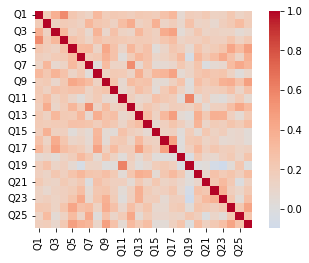

In [121]:
Q_cor = Q_data.corr(method='spearman')
sns.heatmap(Q_cor, cmap='coolwarm', square=True, center=0)

음의 상관관계를 가지는 변수는 없는 것으로 판단 -> 역변환하지 않아도 됨

In [123]:
for col in Q_data:
    print(sorted(Q_data[col].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]


Q 데이터의 모든 항목이 1~5척도로 이루어져 있음

In [124]:
secret_data = ['Q1','Q6','Q14','Q18','Q21','Q22','Q23','Q24','Q25','Q26']

Mach_score column 추가 (Q데이터의 평균값으로 구성)

In [125]:
train_data['Mach_score'] = Q_data.mean(axis=1)
train_data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,religion,orientation,voted,married,familysize,ASD,nerdiness,Mach_score
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,1.0,20,12.0,4.0,2.0,1.0,4.0,2.0,1,3.653846
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,2.0,1.0,1.0,2.0,4.0,2.0,1,3.269231
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,2.0,43,2.0,2.0,2.0,3.0,4.0,2.0,1,3.692308
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,1.0,17,1.0,1.0,2.0,1.0,2.0,2.0,1,3.500000
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,2.0,18,12.0,1.0,2.0,1.0,1.0,2.0,0,3.461538


In [126]:
train_data[['Mach_score']].describe()

,Mach_score
count,12817.000000
mean,3.706033
std,0.581896
min,1.000000
25%,3.346154
50%,3.730769
75%,4.115385
max,5.000000


In [127]:
Q_test_data = test_data.filter(regex='Q',axis=1)
test_data['Mach_score'] = Q_test_data.mean(axis=1)
test_data[['Mach_score']].describe()

,Mach_score
count,35432.000000
mean,3.710776
std,0.577244
min,1.000000
25%,3.346154
50%,3.760000
75%,4.115385
max,5.000000


In [128]:
T_data = train_data.filter(regex='TIPI',axis=1)
T_data

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
index,,,,,,,,,,
0,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,3.0
1,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,2.0
2,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,2.0
3,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0
4,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...
14995,2.0,2.0,4.0,3.0,3.0,5.0,3.0,3.0,3.0,3.0
14996,3.0,2.0,4.0,5.0,4.0,3.0,4.0,1.0,2.0,2.0
14997,1.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,1.0,1.0


<AxesSubplot:>

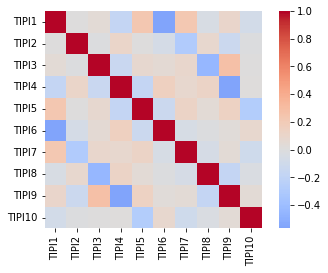

In [129]:
T_cor = T_data.corr(method='spearman')
sns.heatmap(T_cor, cmap='coolwarm', square=True, center=0)

T 데이터에는 음의 상관관계를 가지는 변수가 있음 -> 역변환

<AxesSubplot:>

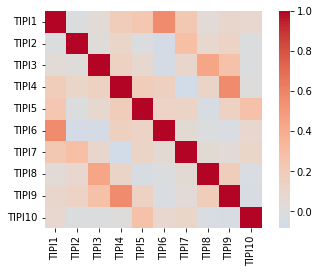

In [130]:
reverse_col = ['TIPI2','TIPI4','TIPI6','TIPI8','TIPI10']
for col in reverse_col:
    train_data[col] = 6 - train_data[col]
    
T_data_new = train_data.filter(regex='TIPI',axis=1)
T_cor_new = T_data_new.corr(method='spearman')
sns.heatmap(T_cor_new, cmap='coolwarm',square=True, center=0)

역변환을 통해 모든 변수가 양의 상관관계를 가짐

In [131]:
for col in T_data_new:
    print(sorted(T_data_new[col].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]


In [132]:
V_data = train_data.filter(regex='VCL',axis=1)
for col in V_data:
    print(sorted(V_data[col].unique()))

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


VCL 데이터 : 단어의 의미를 아는지 모르는지에 대해 체크 -> 0,1로 이루어짐

유효성 테스트 : 6,9,12 번 (1로 체크한 행 삭제처리)

In [139]:
V_effect = ['VCL6','VCL9','VCL12']

for effect_col in V_effect:
    train_data.drop(index = train_data[train_data[effect_col] == 1].index, inplace=True)
    
train_data.shape

(9203, 65)

<AxesSubplot:xlabel='married', ylabel='count'>

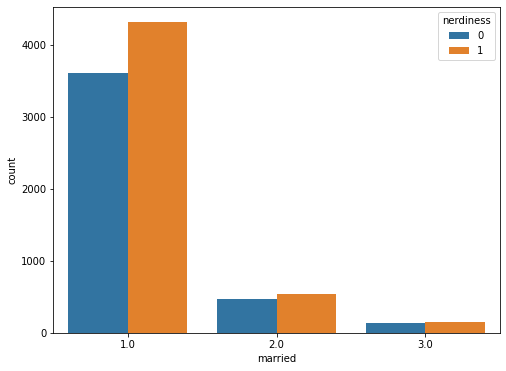

In [140]:
nerd = train_data[train_data['nerdiness'] == 1]
not_nerd = train_data[train_data['nerdiness'] == 0]

plt.figure(figsize=(8,6))
sns.countplot(data = train_data, x = 'married',hue = train_data['nerdiness'])

In [143]:
X_train = train_data.drop(columns='nerdiness')
y_train = train_data['nerdiness']
X_test = test_data.copy()

In [145]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_cols = ['gender','race','religion']

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [148]:
X_test

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,gender,engnat,age,religion,orientation,voted,married,familysize,ASD,Mach_score
index,,,,,,,,,,,,,,,,,,,,,
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,...,2.0,2.0,19,4.0,4.0,1.0,1.0,3.0,2.0,4.192308
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,...,1.0,1.0,33,1.0,5.0,2.0,1.0,5.0,2.0,4.307692
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,...,2.0,2.0,13,4.0,5.0,2.0,1.0,3.0,2.0,4.192308
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,...,1.0,1.0,28,2.0,2.0,2.0,1.0,3.0,2.0,3.769231
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,...,2.0,2.0,15,4.0,5.0,2.0,1.0,2.0,2.0,4.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,3.0,...,2.0,2.0,16,10.0,4.0,2.0,1.0,3.0,2.0,4.153846
35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,3.0,...,3.0,1.0,16,2.0,5.0,2.0,1.0,2.0,2.0,4.423077
35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1.0,1.0,31,1.0,5.0,1.0,1.0,2.0,2.0,4.576923


In [146]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3, shuffle=True, random_state = 42)
rf = RandomForestClassifier()
lgbm = LGBMClassifier()
gbc = GradientBoostingClassifier()

soft_vote = VotingClassifier([('r1',rf), ('r2',lgbm),('r3',gbc)], voting='soft')
soft_vote.fit(X_train, y_train)

VotingClassifier(estimators=[('r1', RandomForestClassifier()),
                             ('r2', LGBMClassifier()),
                             ('r3', GradientBoostingClassifier())],
                 voting='soft')

In [154]:
lgbm.fit(X_train,y_train)
y_pred = lgbm.predict(X_test)

submission = pd.DataFrame({'index' :test_data.index, 'nerdiness':y_pred})
submission.to_csv('submission_lgbm.csv',index=False)

In [155]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

submission = pd.DataFrame({'index' :test_data.index, 'nerdiness':rf_pred})
submission.to_csv('submission_rf.csv',index=False)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [157]:
X_test.shape

(35452, 64)